In [2]:
import numpy as np

In [3]:
length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

# 길이가 50 무게가 얼마일까?

### 예측 : 회귀(regressor)
### 분류 : 분류(class)
### EDA(탐색적 데이터 분석) (80~90%)  --> 데이터(학습용 / 검증용) -> 적절한 머신러닝 선택 -> 평가(평균제곱오차) and score

In [7]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target =  train_test_split(length,weight,random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [18]:
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [19]:
train_input.shape,  train_target.shape

((42, 1), (42,))

In [20]:
[[50]]

[[50]]

In [33]:
knr.predict([[50]])

array([1033.33333333])

In [22]:
# 시각화를 통해 k 최근접 이웃 알고리즘을 적용한 값을 시각화한다.

In [23]:
distnace, indexes =  knr.kneighbors([[50]])
distnace, indexes

(array([[6., 7., 7.]]), array([[34,  8, 14]], dtype=int64))

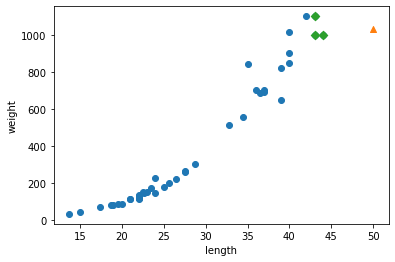

In [31]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.scatter(50,1033, marker='^')
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [36]:
knr.predict([[100]])

array([1033.33333333])

In [37]:
knr.kneighbors([[100]])

(array([[56., 57., 57.]]), array([[34,  8, 14]], dtype=int64))

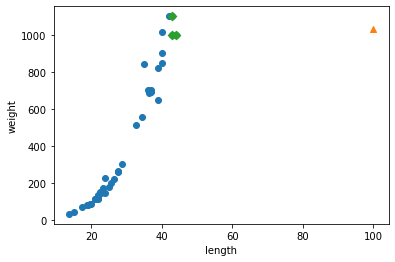

In [38]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.scatter(100,1033, marker='^')
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [40]:
knr.predict([[2]])

array([47.33333333])

# 선형 회귀

In [43]:
from sklearn.linear_model import LinearRegression

In [45]:
lr =  LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [46]:
lr.predict([[50]])

array([1241.83860323])

In [47]:
lr.predict([[100]])

array([3192.69585141])

In [55]:
lr.predict([[8]])

array([-396.88148524])

In [49]:
lr.coef_, lr.intercept_

(array([39.01714496]), -709.0186449535477)

### 선형회귀 시각화

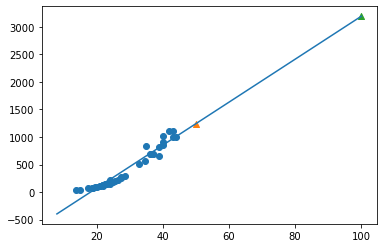

In [82]:
plt.scatter(train_input,train_target)
plt.scatter(50,1241.83860323, marker='^')
plt.scatter(100,3192.69585141, marker='^')
plt.plot([8,100], [-396.88148524,3192.69585141])
plt.show()

In [57]:
lr.score(train_input,train_target),  lr.score(test_input, test_target)

(0.939846333997604, 0.8247503123313558)

In [59]:
from sklearn.metrics import mean_absolute_error
lr_predict =  lr.predict(train_input)
mean_absolute_error(train_target,lr_predict)

64.89383276543607

In [60]:
### 선형 방적식의 문제점은 직선이기때문에.. 음수가 나올수 있다...  그리고 값이 클거나 작을수록 반영이 잘 안될수 있음

### 다항 회귀

In [69]:
a = np.array((1,2,3))
b = np.array((2,3,4))

# 1
np.column_stack((a,b))

# 2
temp = [ [i,j]  for i,j in  zip(a,b) ]
np.array(temp)

array([[1, 2],
       [2, 3],
       [3, 4]])

In [70]:
train_poly =  np.column_stack((train_input**2, train_input ))
test_poly = np.column_stack((test_input**2, test_input ))

In [71]:
train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [73]:
# 훈련
lr.fit(train_poly,train_target)

LinearRegression()

In [74]:
# 예측
lr.predict([[50**2,50]])

array([1573.98423528])

In [76]:
lr.coef_, lr.intercept_

(array([  1.01433211, -21.55792498]), 116.05021078278259)

In [77]:
lr.coef_[0]*(50**2)+lr.coef_[1]*50+lr.intercept_

1573.9842352827407

### 다형 회귀 에대한 시각화

In [97]:
point =  np.arange(15,50)
lr.coef_[0]*(point**2) + lr.coef_[1]*point + lr.intercept_

array([  20.90606071,   30.79243112,   42.70746575,   56.6511646 ,
         72.62352767,   90.62455496,  110.65424646,  132.71260219,
        156.79962213,  182.91530629,  211.05965467,  241.23266727,
        273.43434409,  307.66468513,  343.92369038,  382.21135986,
        422.52769355,  464.87269146,  509.24635359,  555.64867994,
        604.07967051,  654.5393253 ,  707.0276443 ,  761.54462753,
        818.09027497,  876.66458663,  937.26756251,  999.89920261,
       1064.55950693, 1131.24847547, 1199.96610822, 1270.7124052 ,
       1343.48736639, 1418.2909918 , 1495.12328143])

In [98]:
lr.predict([[i**2,i] for i in point])

array([  20.90606071,   30.79243112,   42.70746575,   56.6511646 ,
         72.62352767,   90.62455496,  110.65424646,  132.71260219,
        156.79962213,  182.91530629,  211.05965467,  241.23266727,
        273.43434409,  307.66468513,  343.92369038,  382.21135986,
        422.52769355,  464.87269146,  509.24635359,  555.64867994,
        604.07967051,  654.5393253 ,  707.0276443 ,  761.54462753,
        818.09027497,  876.66458663,  937.26756251,  999.89920261,
       1064.55950693, 1131.24847547, 1199.96610822, 1270.7124052 ,
       1343.48736639, 1418.2909918 , 1495.12328143])

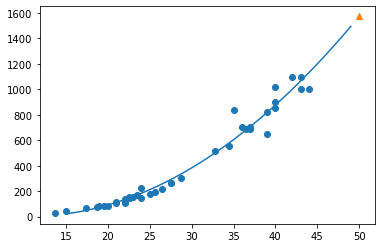

In [104]:
point =  np.arange(15,50)
plt.scatter(train_input, train_target)
plt.scatter(50,1573.98423528, marker='^')
plt.plot(point, lr.predict([[i**2,i] for i in point]))
plt.show()

### 문제점이 일단 해결..... 길이에 따른 무게가 마이너스가 나오는오류를 해결  직선의 방정식을 - > 곡선의 방정식으로 변환
### 그러면 길이가 1 2 3 이렇게 작을때는 ?? 

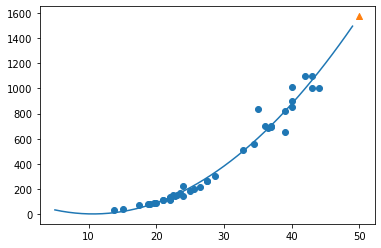

In [105]:
point =  np.arange(5,50)
plt.scatter(train_input, train_target)
plt.scatter(50,1573.98423528, marker='^')
plt.plot(point, lr.predict([[i**2,i] for i in point]))
plt.show()